In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/refs/heads/master/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
X = df.iloc[:20,0].values
y = df.iloc[:20,1].values

test_X = df.iloc[20:,0].values
test_y = df.iloc[20:,1].values

In [5]:
class SimpleLinearRegression:

    def __init__(self):
        self.m = None
        self.b = None


    def fit(self,X,y):
        mean_X = np.mean(X)
        mean_y = np.mean(y)
        
        numerator = 0
        denominator = 0
        
        for i in range(X.shape[0]):

            numerator += (y[i] - mean_y) * (X[i] - mean_X)
            denominator += (X[i] - mean_X)**2

        self.m = numerator / denominator
        self.b = mean_y - self.m * mean_X
        print(self.m,self.b)

    def predict(self,test):
        return self.m * test + self.b

In [6]:
lr = SimpleLinearRegression()
lr.fit(X=X,y=y)
y_pred = lr.predict(test_X)
r2_score(y_pred,test_y)

9116.114200692717 26577.40001951315


0.7788993306658581

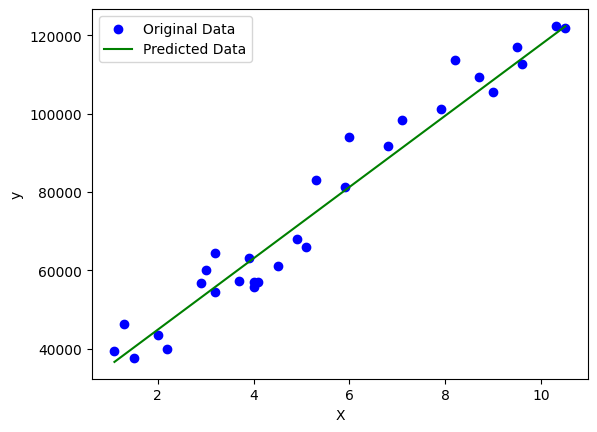

In [11]:
prediction = lr.predict(df["YearsExperience"])
plt.scatter(df["YearsExperience"],df["Salary"],color="blue",label="Original Data")
plt.plot(df["YearsExperience"],prediction,color="green",label="Predicted Data")

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
r2 = r2_score(prediction,df["Salary"])
n = df.shape[0]
k = 1 # number of columns
adjusted_r2 = 1 - ((1 - r2)*(n - 1)/(n - 1 - k))
adjusted_r2

0.946985840329657